In [288]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [289]:
print(os.listdir(""))

['.idea', '.venv', 'anime analysis.ipynb', 'AnimeList.csv', 'animelists_cleaned.csv', 'animelists_filtered.csv', 'anime_cleaned.csv', 'anime_filtered.csv', 'UserAnimeList.csv', 'UserList.csv', 'users_cleaned.csv', 'users_filtered.csv']


In [290]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# anime_cleaned.csv has 6669 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:.../anime_cleaned.csv', header=0,delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'anime_cleaned.csv'
nRow, nCol = df1.shape
pd.set_option('display.max_columns', None)

df1.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,1000.000000,1000.000000,1000.000000,1000.000000,960.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,14073.189000,17.204000,6.917440,28625.902000,4159.242708,4223.929000,5.648468e+04,952.508000,28.192267,2006.848000
std,12860.168063,39.015158,0.919242,65491.431594,3246.778930,3415.897483,1.152380e+05,4552.562333,24.817378,9.913282
min,16.000000,0.000000,3.400000,2.000000,2.000000,6.000000,5.400000e+01,0.000000,0.000000,1963.000000
25%,2161.750000,1.000000,6.350000,840.750000,1436.250000,1397.250000,2.568500e+03,3.000000,20.000000,2002.000000
50%,9501.000000,12.000000,7.010000,4679.000000,3479.000000,3330.000000,1.277600e+04,29.000000,24.000000,2010.000000
75%,27552.000000,23.000000,7.550000,24370.750000,6316.750000,6327.500000,5.729800e+04,220.250000,26.000000,2014.000000
max,37710.000000,694.000000,9.190000,659308.000000,12855.000000,13898.000000,1.013138e+06,69760.000000,162.000000,2018.000000


In [291]:
df1.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [292]:
df1.head(10)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
5,6586,Yume-iro Pâtissière,NaN,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,50,Finished Airing,False,"Oct 4, 2009 to Sep 26, 2010","{'from': '2009-10-04', 'to': '2010-09-26'}",24 min. per ep.,G - All Ages,8.03,21618,526.0,1630,45625,826,NaN,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",NaN,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",24.0,2009.0
6,178,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,NaN,

In [293]:

df1['genre'] = df1['genre'].str.split(',')
df1 = df1.explode('genre')


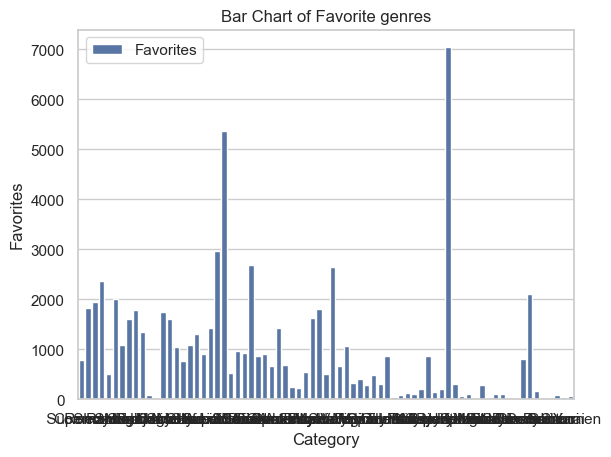

In [294]:
#df1.head()
top_n = 10
df1 = df1.sort_values(by='favorites', ascending=False).head(top_n)
#df1['favorites'] = df1['favorites']/10000

plt.figure()
sns.set_theme(style="whitegrid")
sns.barplot(x='genre', y='favorites', data=df1, label="Favorites",errorbar=None)
#plt.yticks(range(0,10,1))
plt.title("Bar Chart of Favorite genres")

plt.xlabel('Category')
plt.ylabel('Favorites')
plt.show()